In [ ]:
#Unsupervised Learning

In [1]:
%pip install pandas


  Using cached numpy-2.3.0-cp311-cp311-win_amd64.whl.metadata (60 kB)
  Using cached pytz-2025.2-py2.py3-none-any.whl.metadata (22 kB)
  Using cached tzdata-2025.2-py2.py3-none-any.whl.metadata (1.4 kB)
   ---------------------------------------- 0.0/11.1 MB ? eta -:--:--
   ---------------------------------------- 0.0/11.1 MB ? eta -:--:--
   ---------------------------------------- 0.0/11.1 MB 217.9 kB/s eta 0:00:51
   ---------------------------------------- 0.1/11.1 MB 372.4 kB/s eta 0:00:30
   ---------------------------------------- 0.1/11.1 MB 459.5 kB/s eta 0:00:24
    --------------------------------------- 0.2/11.1 MB 701.4 kB/s eta 0:00:16
    --------------------------------------- 0.2/11.1 MB 846.9 kB/s eta 0:00:13
   - -------------------------------------- 0.3/11.1 MB 965.4 kB/s eta 0:00:12
   - -------------------------------------- 0.4/11.1 MB 1.2 MB/s eta 0:00:10
   - -------------------------------------- 0.5/11.1 MB 1.2 MB/s eta 0:00:10
   -- -----------------------


[notice] A new release of pip is available: 24.0 -> 25.1.1
[notice] To update, run: python.exe -m pip install --upgrade pip


In [11]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans


In [5]:
#Creating a dataset
data ={
    'CustomerID' : [1,2,3,4,5,6,7,8,9,10],
    'Annual_Income_(USD$)' : [15,16,17,18,19,80,85,86,87,88],
    'Spending_Score_(1-100)' :[38,81,6,77,40,76,94,3,72,14]
      }
df=pd.DataFrame(data)
# print(df)
df.head(10)

,CustomerID,Annual_Income_(USD$),Spending_Score_(1-100)
0,1,15,38
1,2,16,81
2,3,17,6
3,4,18,77
4,5,19,40
5,6,80,76
6,7,85,94
7,8,86,3
8,9,87,72
9,10,88,14


In [6]:
#Select Features for clustering
x= df[['Annual_Income_(USD$)','Spending_Score_(1-100)']]

In [7]:
#I use only 2 clusters while applying K-Means clustering
kmeans =KMeans(n_clusters=2,random_state=0)
kmeans.fit(x)

,n_clusters,2
,init,'k-means++'
,n_init,'auto'
,max_iter,300
,tol,0.0001
,verbose,0
,random_state,0
,copy_x,True
,algorithm,'lloyd'


In [8]:
df['Cluster'] =kmeans.labels_
print(df)

   CustomerID  Annual_Income_(USD$)  Spending_Score_(1-100)  Cluster
0           1                    15                      38        1
1           2                    16                      81        1
2           3                    17                       6        1
3           4                    18                      77        1
4           5                    19                      40        1
5           6                    80                      76        0
6           7                    85                      94        0
7           8                    86                       3        0
8           9                    87                      72        0
9          10                    88                      14        0


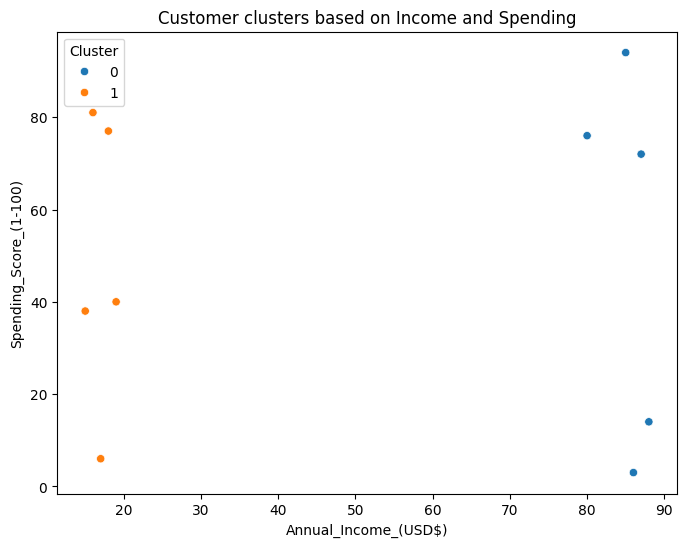

In [10]:
#Visualize the cluster
plt.figure(figsize=(8,6))
sns.scatterplot(data=df,x='Annual_Income_(USD$)',y='Spending_Score_(1-100)', hue='Cluster')
plt.title('Customer clusters based on Income and Spending')
plt.xlabel('Annual_Income_(USD$)')
plt.ylabel('Spending_Score_(1-100)')
plt.show()

In [ ]:
#Assignment left after Monday morning class week 4
df2 =pd.read_csv('customer_data_records.csv')
df2.head(90)

,CustomerID,Annual Income (k$),Spending Score (1-100)
0,1,117,20
1,2,107,59
2,3,29,36
3,4,121,19
4,5,86,90
...,...,...,...
85,86,42,38
86,87,149,51
87,88,86,54
88,89,26,8


In [15]:
df2.shape

(174, 3)

In [16]:
df2.isnull().sum()

CustomerID                0
Annual Income (k$)        0
Spending Score (1-100)    0
dtype: int64

In [18]:
df2.columns

Index(['CustomerID', 'Annual Income (k$)', 'Spending Score (1-100)'], dtype='object')

In [20]:
x= df2[['Annual Income (k$)','Spending Score (1-100)']]

In [21]:
kmeans =KMeans(n_clusters=2,random_state=1)
kmeans.fit(x)

,n_clusters,2
,init,'k-means++'
,n_init,'auto'
,max_iter,300
,tol,0.0001
,verbose,0
,random_state,1
,copy_x,True
,algorithm,'lloyd'


In [22]:
df2['Cluster'] =kmeans.labels_
print(df2)

     CustomerID  Annual Income (k$)  Spending Score (1-100)  Cluster
0             1                 117                      20        1
1             2                 107                      59        1
2             3                  29                      36        0
3             4                 121                      19        1
4             5                  86                      90        0
..          ...                 ...                     ...      ...
169         170                 111                      76        1
170         171                 138                      87        1
171         172                  84                      15        0
172         173                 107                      92        1
173         174                  17                      98        0

[174 rows x 4 columns]


In [23]:
df2.head(20)

,CustomerID,Annual Income (k$),Spending Score (1-100),Cluster
0,1,117,20,1
1,2,107,59,1
2,3,29,36,0
3,4,121,19,1
4,5,86,90,0
5,6,35,67,0
6,7,117,19,1
7,8,136,20,1
8,9,89,96,0
9,10,102,71,1


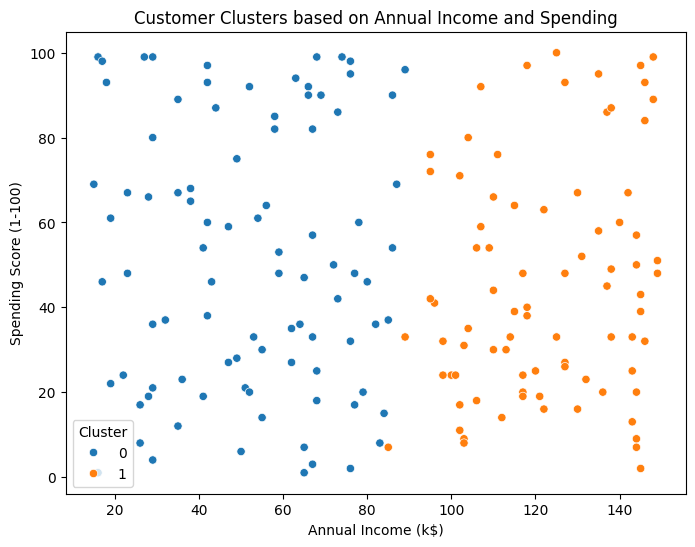

In [24]:
#Visualizing the cluster with a scatterplot
plt.figure(figsize=(8,6))
sns.scatterplot(df2,x='Annual Income (k$)',y='Spending Score (1-100)', hue='Cluster')
plt.title('Customer Clusters based on Annual Income and Spending')
plt.xlabel('Annual Income (k$)')
plt.ylabel('Spending Score (1-100)')
plt.show()